## Context

Run a linear regression with Total Income as the dependent variable and your choice of four other variables as the independent variables (NOTE: Don’t limit your analysis to the variables presented; feel free to try aggregations or categorical variables from the original variables). Explain why you chose those independent variables and give a general analysis of the results and what they mean.

### Basic Exploration

Let's have a look at what is avaiable in the data frame first.

In [203]:
import pandas as pd
import numpy as np
from datetime import date, datetime,  timedelta
import seaborn as sns

In [170]:
data = pd.read_csv('data/aes-2015-csv.csv')
data.head()


,Year,Industry_aggregation_NZSIOC,Industry_code_NZSIOC,Industry_name_NZSIOC,Units,Variable_code,Variable_name,Variable_category,Value,Industry_code_ANZSIC06
0,2015,Level 1,99999,All industries,Dollars (millions),H01,Total income,Financial performance,590050,ANZSIC06 divisions A-S (excluding classes K633...
1,2015,Level 1,99999,All industries,Dollars (millions),H02,Sales of goods not further processed,Financial performance,0,ANZSIC06 divisions A-S (excluding classes K633...
2,2015,Level 1,99999,All industries,Dollars (millions),H03,Sales of other goods and services,Financial performance,0,ANZSIC06 divisions A-S (excluding classes K633...
3,2015,Level 1,99999,All industries,Dollars (millions),H04,"Sales, government funding, grants and subsidies",Financial performance,518885,ANZSIC06 divisions A-S (excluding classes K633...
4,2015,Level 1,99999,All industries,Dollars (millions),H05,"Interest, dividends and donations",Financial performance,53898,ANZSIC06 divisions A-S (excluding classes K633...


Clearly, this is a table with many variables embeded as rows, some reshaping/extracting will be required. \
But first let's see how many unique variables are there

In [122]:
unique_variables = data['Variable_name'].unique()
unique_variables.shape


(41,)

It seems like the basic structure of the tbale is, for every industry, across every year (between 2013-15), across every industry level (1, 3, 4), there are 41 variables (including Total Income) that are measured (in the Value column)

So to make things easier, we can change this long table to a wide table, by first controlling for year and industry level, then stack together the pivotted tables

In [193]:
l = list(data.groupby(['Year', 'Industry_aggregation_NZSIOC']))
tables = []
for i in l:
   out = i[1].pivot_table(index= ['Industry_code_NZSIOC'], columns='Variable_name', values='Value', aggfunc='first')
   tables.append(out)

wide_df = pd.concat(tables).reset_index('Industry_code_NZSIOC')
wide_df.head()


Variable_name,Industry_code_NZSIOC,Additions to fixed assets,Closing stocks,Current assets,Current liabilities,Current ratio,Depreciation,Disposals of fixed assets,Fixed tangible assets,"Government funding, grants and subsidies",...,"Sales, government funding, grants and subsidies",Shareholders funds or owners equity,Surplus before income tax,Surplus per employee count,Surplus per employee count(3),Total assets,Total equity and liabilities,Total expenditure,Total income,Total income per employee count(3)
0,99999,NaN,50442,488032,631136,77,15873,NaN,375804,0,...,473662,519935,52868,33800,NaN,1660278,1660278,488612,541042,346000
1,AA,NaN,13158,24740,22334,111,1562,NaN,79096,9,...,NaN,66021,3403,33800,NaN,139387,139387,30668,34476,342500
2,BB,1279,337,20433,20361,100,922,68,8597,0,...,NaN,6885,1919,319600,NaN,31952,31952,6162,8065,1343400
3,CC,3924,12367,32192,25996,124,2394,1355,22923,44,...,NaN,32352,3078,14100,NaN,70554,70554,93988,96770,444500
4,DD,2993,369,6080,8731,70,1684,684,49459,C,...,NaN,33069,2620,174600,NaN,62132,62132,15801,18414,1227400


In [194]:
#clean up the data a little bit.
for col in wide_df.columns[1:]:
    wide_df[col] =pd.to_numeric(wide_df[col], errors ='coerce').fillna(0).astype('int')

wide_df.columns

Index(['Industry_code_NZSIOC', 'Additions to fixed assets', 'Closing stocks',
       'Current assets', 'Current liabilities', 'Current ratio',
       'Depreciation', 'Disposals of fixed assets', 'Fixed tangible assets',
       'Government funding, grants and subsidies', 'Indirect taxes',
       'Interest and donations', 'Interest, dividends and donations',
       'Liabilities structure', 'Margin on sales of goods for resale',
       'Non-operating expenses', 'Non-operating income', 'Opening stocks',
       'Other assets', 'Other liabilities',
       'Other purchases and operating expenses',
       'Purchases and other operating expenses',
       'Purchases of goods bought for resale', 'Quick ratio',
       'Redundancy and severance', 'Return on equity',
       'Return on total assets', 'Salaries and wages paid',
       'Salaries and wages to self employed commission agents',
       'Sales of goods and services', 'Sales of goods not further processed',
       'Sales of other goods and s

In [195]:
# Remove unwanted columns
unwanted_columns = ['Industry_code_NZSIOC', 'Additions to fixed assets', 'Closing stocks',
        'Current ratio',
       'Depreciation', 'Disposals of fixed assets',
       'Liabilities structure', 'Margin on sales of goods for resale',
        'Opening stocks',
       'Purchases of goods bought for resale', 'Quick ratio',
         'Return on equity',
       'Return on total assets', 
       'Shareholders funds or owners equity', 'Surplus before income tax',
       'Surplus per employee count', 'Surplus per employee count(3)',
        'Total income per employee count(3)']
wide_df.drop(unwanted_columns, axis=1, inplace=True)


It's always a good idea to look to have a closer look at our data — especially for outliers. Let's start by printing out some summary statistics about the data set.



In [190]:
wide_df.describe()

Variable_name,Current assets,Current liabilities,Fixed tangible assets,"Government funding, grants and subsidies",Indirect taxes,Interest and donations,"Interest, dividends and donations",Non-operating expenses,Non-operating income,Other assets,...,Salaries and wages paid,Salaries and wages to self employed commission agents,Sales of goods and services,Sales of goods not further processed,Sales of other goods and services,"Sales, government funding, grants and subsidies",Total assets,Total equity and liabilities,Total expenditure,Total income
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,...,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,4.170000e+02,4.170000e+02,417.000000,417.000000
mean,13384.165468,18013.364508,9889.047962,13.956835,169.959233,1013.047962,1504.769784,327.913669,392.143885,22978.997602,...,2209.700240,44.314149,3289.928058,2397.498801,1991.817746,4513.918465,4.705583e+04,4.705583e+04,12998.959233,14629.844125
std,54946.648482,81619.358185,38453.560124,50.350245,635.830840,4330.526045,7288.734475,1400.273508,1604.728150,110359.320838,...,7321.182901,204.603697,6856.016782,9304.128866,8255.548539,42221.413217,1.897680e+05,1.897680e+05,44498.915964,49712.760776
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,468.000000,476.000000
25%,718.000000,588.000000,429.000000,0.000000,7.000000,21.000000,7.000000,10.000000,2.000000,229.000000,...,440.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.401000e+03,2.401000e+03,2498.000000,2626.000000
50%,1848.000000,1636.000000,1096.000000,0.000000,19.000000,73.000000,34.000000,42.000000,26.000000,870.000000,...,803.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.057000e+03,5.057000e+03,4627.000000,5203.000000
75%,5228.000000,3933.000000,3848.000000,2.000000,59.000000,223.000000,202.000000,138.000000,131.000000,3192.000000,...,1877.000000,0.000000,3879.000000,230.000000,1594.000000,0.000000,1.367400e+04,1.367400e+04,10914.000000,12123.000000
max,524779.000000,700256.000000,410187.000000,492.000000,6438.000000,38141.000000,53898.000000,15765.000000,17266.000000,857523.000000,...,88708.000000,1685.000000,45111.000000,80916.000000,91855.000000,518885.000000,1.792488e+06,1.792488e+06,528163.000000,590050.000000


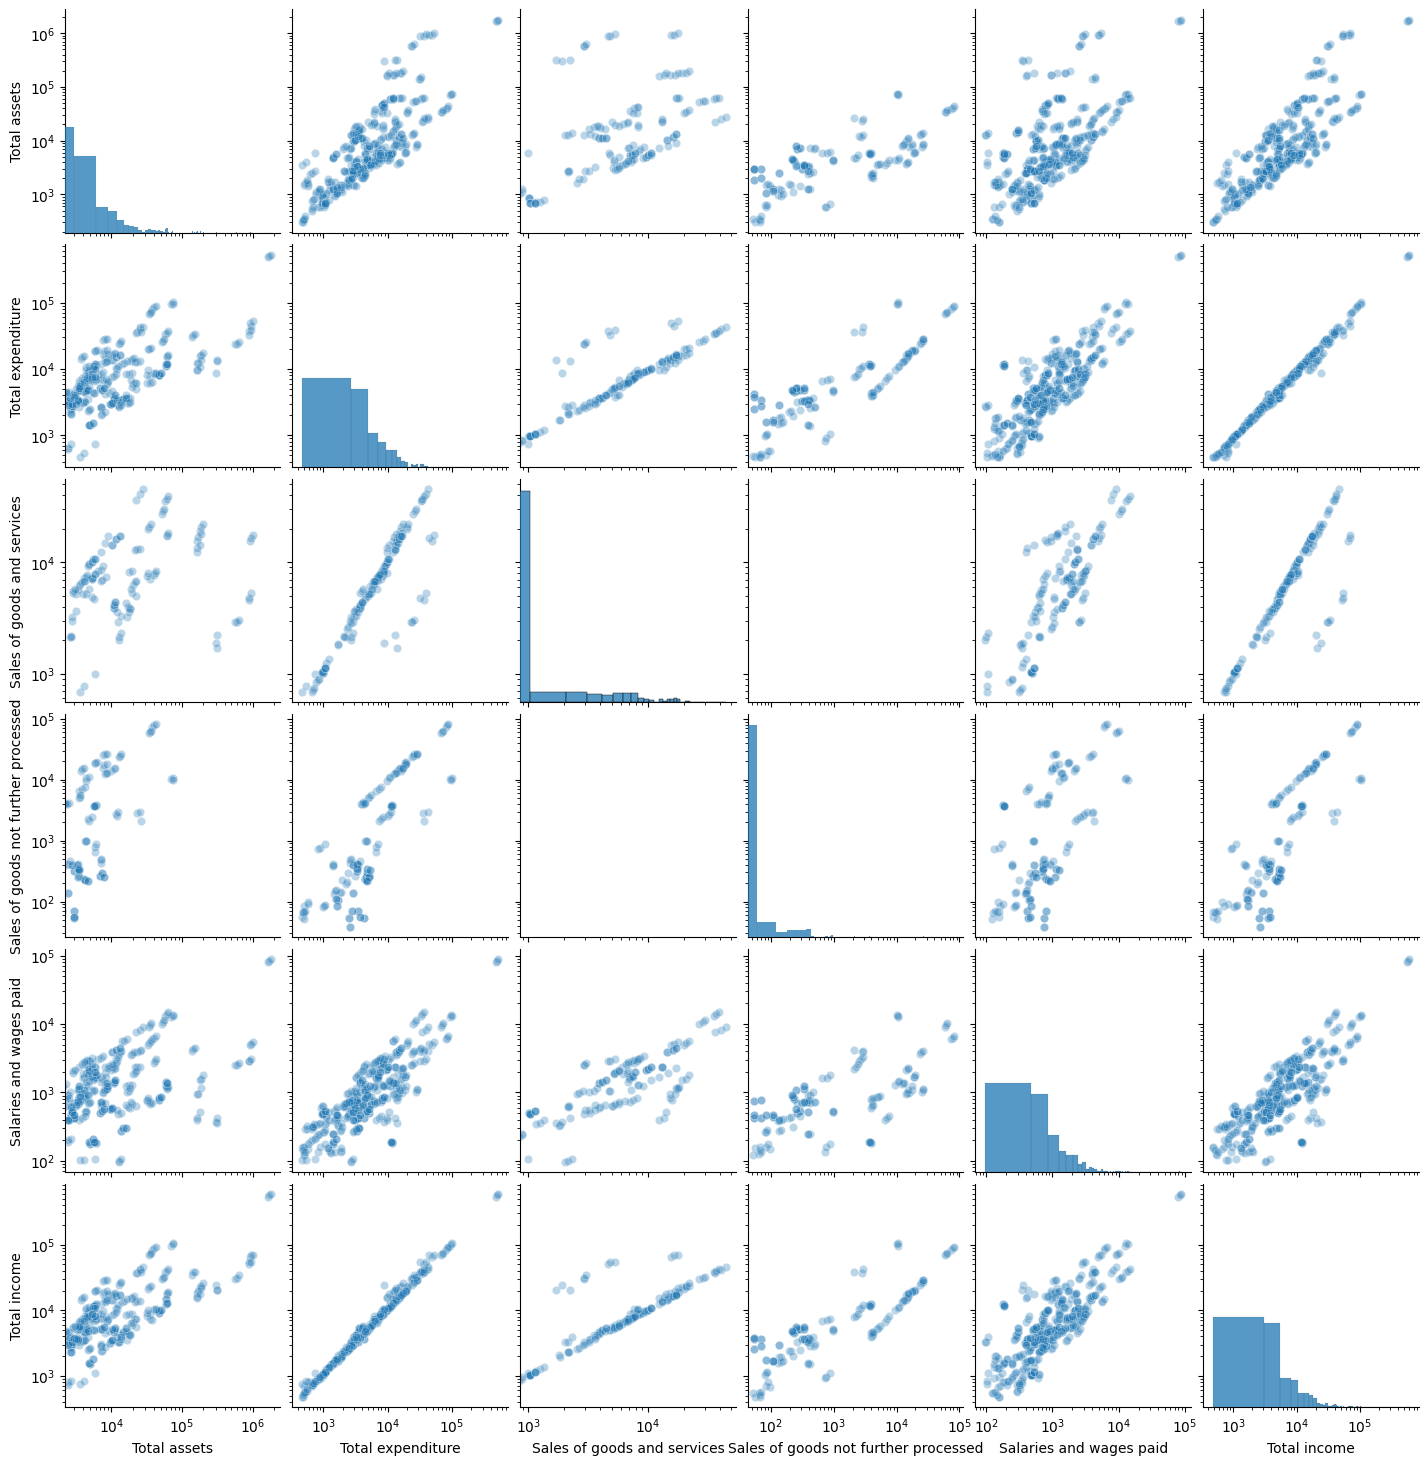

In [199]:
# Measurements scatterplot
measurements = ['Total assets',  'Total expenditure', 'Sales of goods and services', 'Sales of goods not further processed', 'Salaries and wages paid']
selected_columns = measurements + ['Total income']
g = sns.pairplot(wide_df[selected_columns], plot_kws={'alpha': 0.3})
g.set(xscale="log")
g.set(yscale="log")

## Let's start doing regression

#### Preparing the data set

In [225]:
# Set a random seed number to reproduce our results
seed = 123

# 1. Load the dataset 
df = wide_df

# 2. Select the columns of interest for modelling
features = ['Total assets',  'Total expenditure', 'Sales of goods and services', 'Sales of goods not further processed', 'Salaries and wages paid']

# 3. Create the features matrix as X
X = df[features]

# 4. Create the labels vector as y
y = df['Total income']

#### Split the dataset


Create a training and test dataset using the train_test_split function

In [226]:
# Import the function
from sklearn.model_selection import train_test_split

# Split the dataset into X_train, X_test, y_train, y_test
# Use a training dataset size of 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=seed)

In [227]:
# Step 1: Import the classes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 2: Instantiate the estimators
lr = LinearRegression()

# Step 3: Fit the estimators on data (i.e. train the models)
lr.fit(X_train, y_train)

# Step 4: Generate predictions
y_pred = lr.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE)
# np.sqrt(mean_squared_error(...))
score = np.sqrt(mean_squared_error(y_test, y_pred))

# Display the model scores
print('Linear regression: %.3f' % (score))

Linear regression: 922.774


In [228]:
# calculate the correlation between the labels and predictions
corr = np.corrcoef(y_test, y_pred)[0][1]

print('Linear regression: %.3f' % (corr))

print(lr.intercept_)
print(lr.coef_)

Linear regression: 0.999
-4.16392091815942
[ 0.01713442  1.05001024  0.04869003 -0.03276933  0.06065477]


In [229]:
# pair coefficients with feature names
coeff = list(zip(features, lr.coef_))
coeff

[('Total assets', 0.01713441866806446),
 ('Total expenditure', 1.0500102383852488),
 ('Sales of goods and services', 0.048690030507279464),
 ('Sales of goods not further processed', -0.0327693317747218),
 ('Salaries and wages paid', 0.060654767030396045)]

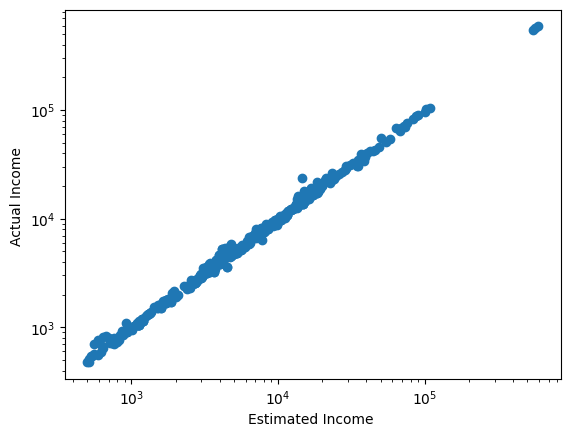

In [235]:
from matplotlib import pyplot as plt

y_est = X[coeff[0][0]]*coeff[0][1]+X[coeff[1][0]]*coeff[1][1]+X[coeff[2][0]]*coeff[2][1]+X[coeff[3][0]]*coeff[3][1]+X[coeff[4][0]]*coeff[4][1]+ lr.intercept_

plt.figure()

plt.scatter(y_est, y)
plt.xlabel('Estimated Income ')
plt.ylabel('Actual Income ')
plt.yscale('log')
plt.xscale('log')
plt.show()